In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [5]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
y_train = y_train.reshape(-1,)

In [8]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [9]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
from tensorflow.keras import layers, models
lenet = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S1
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'), #C3
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='relu'), #F1
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [12]:
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 16, 16, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 6, 6, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 480)              

In [13]:
lenet.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [14]:
hist = lenet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 23s 14ms/step - loss: 1.6397 - accuracy: 0.4036 - val_loss: 1.4863 - val_accuracy: 0.4581
Epoch 2/100
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3611 - accuracy: 0.5094 - val_loss: 1.3291 - val_accuracy: 0.5223
Epoch 3/100
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2354 - accuracy: 0.5593 - val_loss: 1.2116 - val_accuracy: 0.5610
Epoch 4/100
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1496 - accuracy: 0.5908 - val_loss: 1.1673 - val_accuracy: 0.5790
Epoch 5/100
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0789 - accuracy: 0.6177 - val_loss: 1.1309 - val_accuracy: 0.5962
Epoch 6/100
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0251 - accuracy: 0.6380 - val_loss: 1.0841 - val_accuracy: 0.6152
Epoch 7/100
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9778 - accuracy: 0.6524 - val_loss: 1

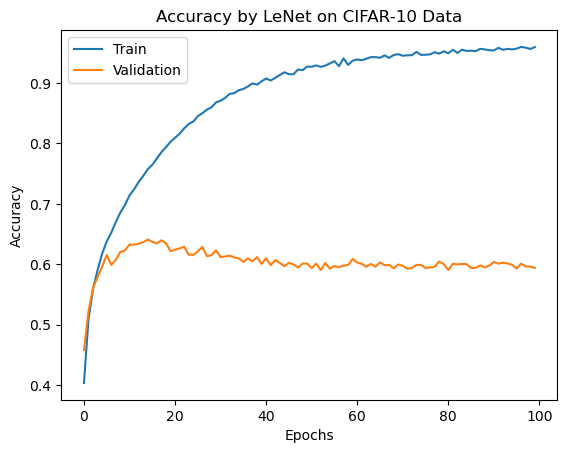

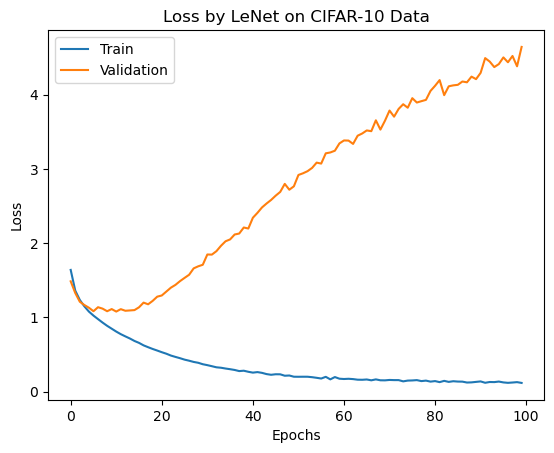

In [15]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

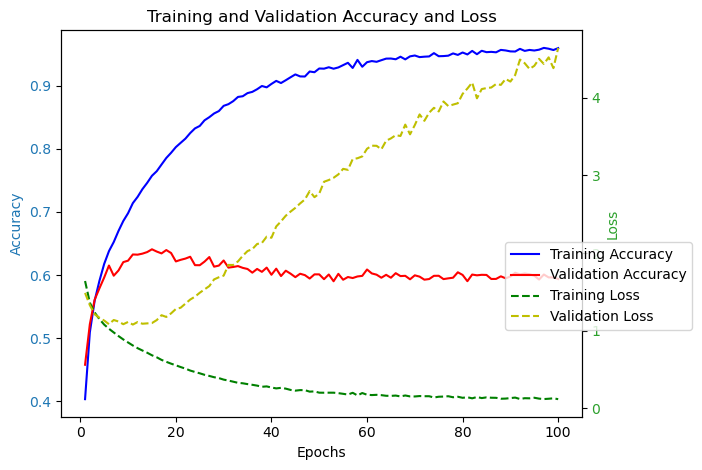

In [16]:
# 3. Create at least two more visualizations using matplotlib (Other than provided in the source file)

# Assuming hist.history contains the history of your training process
epochs = range(1, len(hist.history['accuracy']) + 1)

fig, ax1 = plt.subplots()

# Plotting training and validation accuracy
ax1.plot(epochs, hist.history['accuracy'], 'b-', label='Training Accuracy')
ax1.plot(epochs, hist.history['val_accuracy'], 'r-', label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy and Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis for the loss plot
ax2 = ax1.twinx()
ax2.plot(epochs, hist.history['loss'], 'g--', label='Training Loss')
ax2.plot(epochs, hist.history['val_loss'], 'y--', label='Validation Loss')
ax2.set_ylabel('Loss', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Adding a legend to the plot
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 0.5))
plt.show()


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

313/313 [==============================] - 1s 2ms/step


array([[649,  25,  69,  25,  36,  11,  12,  23, 100,  50],
       [ 32, 687,   8,  16,   4,   6,  10,   6,  59, 172],
       [ 75,   8, 495,  93, 102,  69,  57,  46,  34,  21],
       [ 28,  13,  91, 408,  96, 161,  94,  46,  21,  42],
       [ 35,   8, 101,  95, 495,  56,  53, 115,  18,  24],
       [ 17,  12,  73, 221,  69, 434,  47,  86,  15,  26],
       [ 13,  12,  74,  98,  78,  40, 617,  19,  18,  31],
       [ 42,   8,  27,  63,  97,  51,  19, 652,   9,  32],
       [ 82,  36,  15,  18,  22,  10,   4,  11, 753,  49],
       [ 44,  81,  15,  18,   3,   6,  12,  26,  46, 749]])

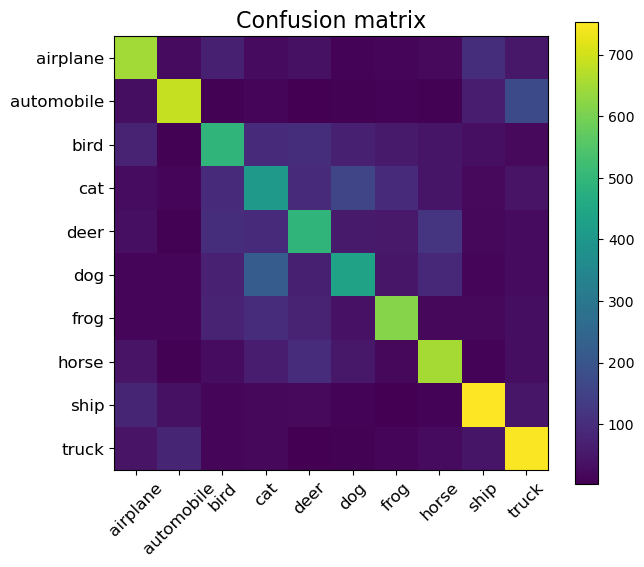

In [18]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [19]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.5939


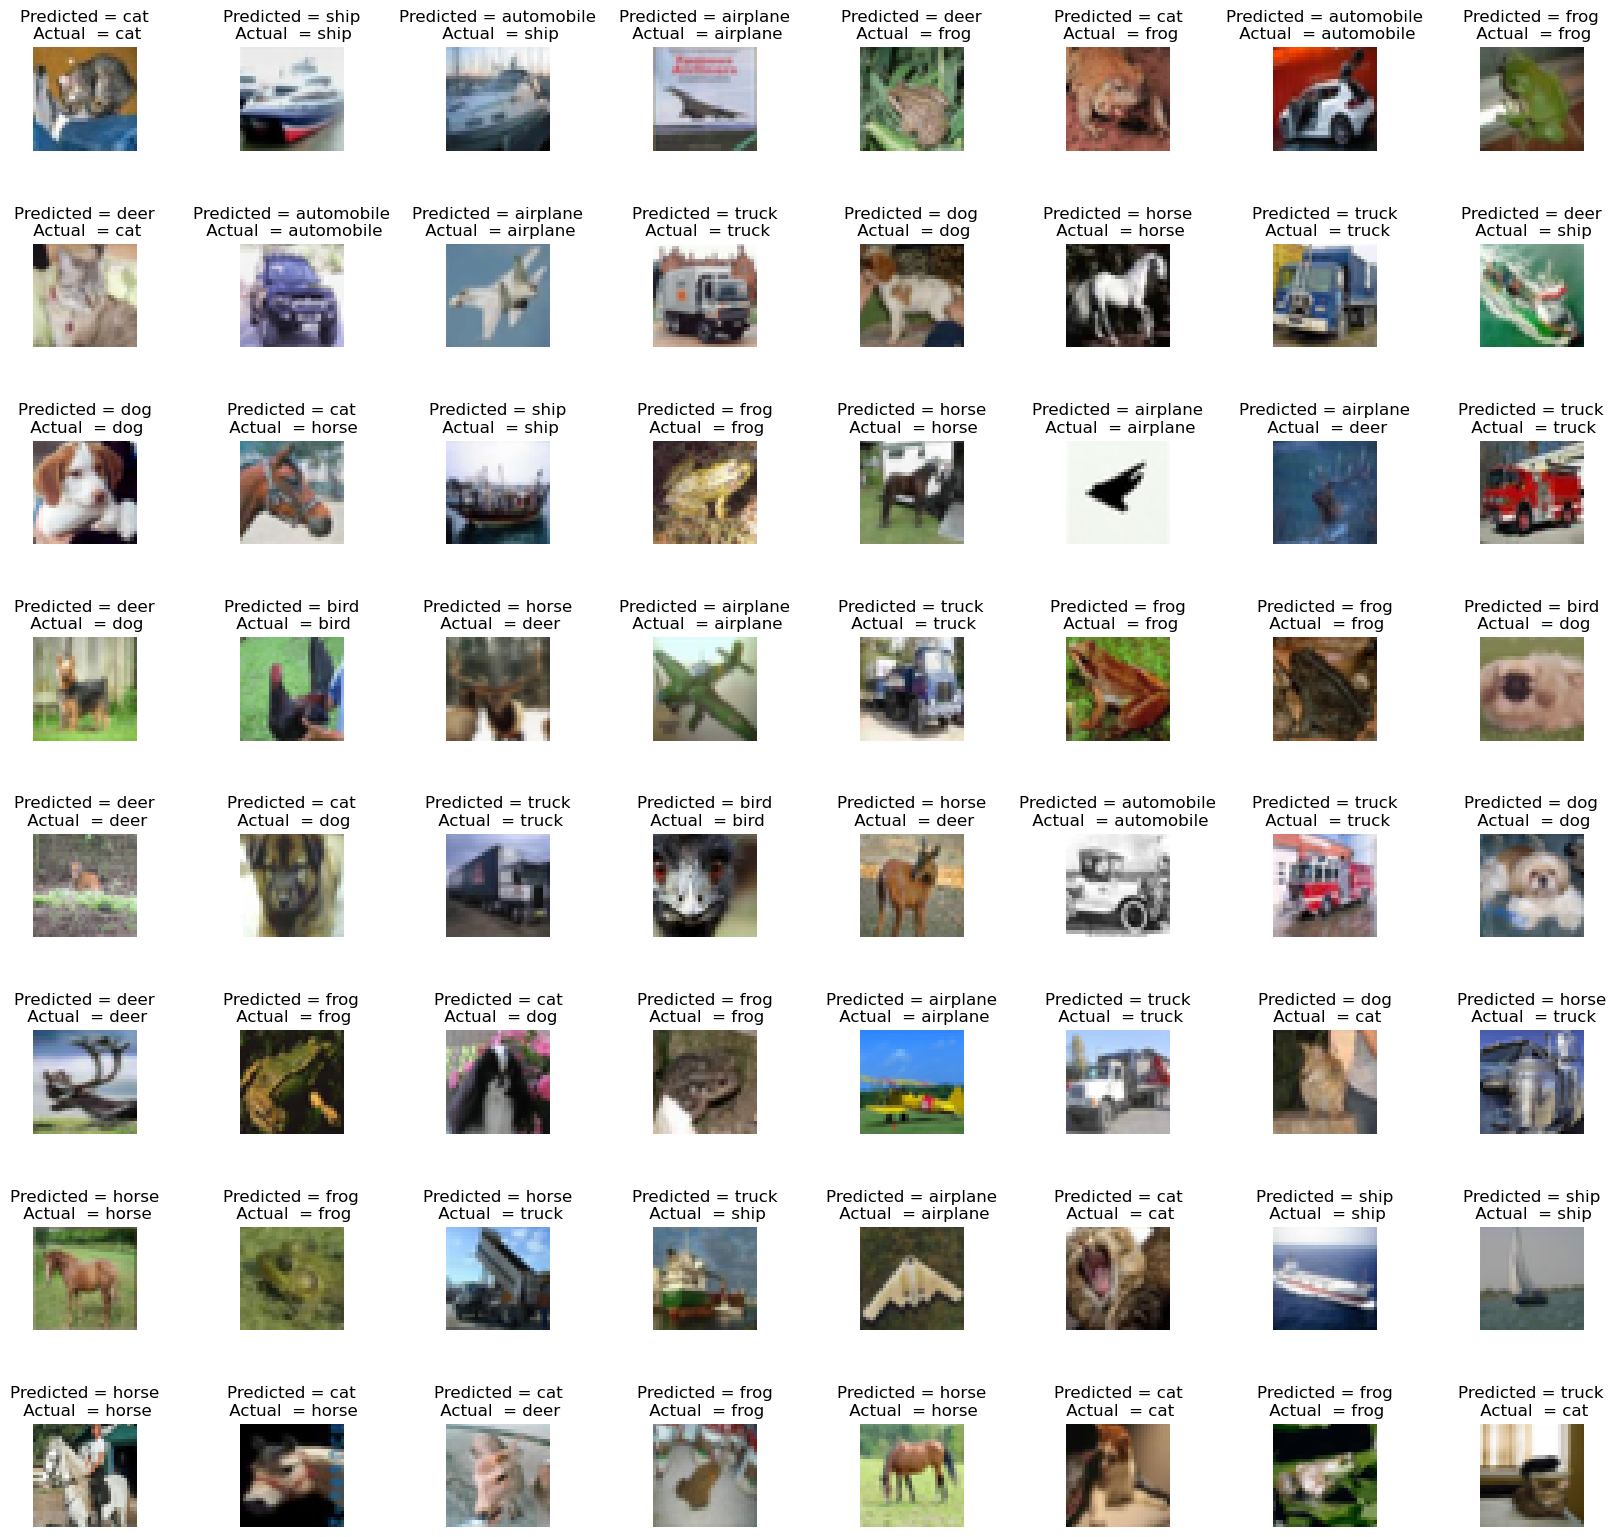

In [20]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [21]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam


In [22]:
#Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(3,3),strides=(4,4),input_shape=(32,32,3), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(5,5),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(10,activation='softmax'))

AlexNet.compile(optimizer='SGD', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 8, 8, 16)          448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 60)          24060     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 60)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 2, 2, 60)          32460     
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 30)         

In [23]:
history1 = AlexNet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3020 - accuracy: 0.1070 - val_loss: 2.3004 - val_accuracy: 0.1287
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 2.2923 - accuracy: 0.1447 - val_loss: 2.2659 - val_accuracy: 0.1529
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1449 - accuracy: 0.1794 - val_loss: 2.0330 - val_accuracy: 0.2120
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0208 - accuracy: 0.2031 - val_loss: 1.9663 - val_accuracy: 0.2235
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9462 - accuracy: 0.2222 - val_loss: 1.9040 - val_accuracy: 0.2488
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8682 - accuracy: 0.2639 - val_loss: 1.7937 - val_accuracy: 0.3109
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7460 - accuracy: 0.3278 - val_loss: 1.6964 - val_ac

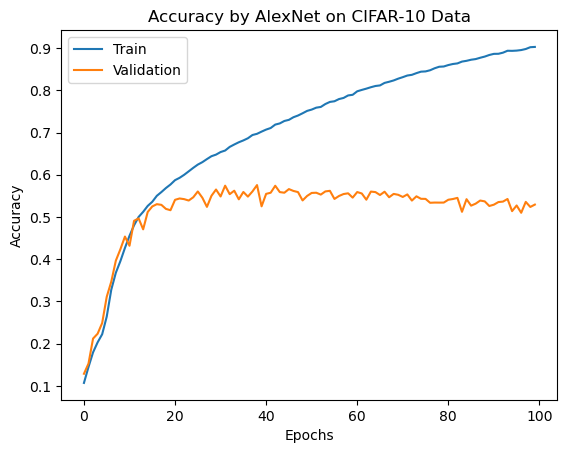

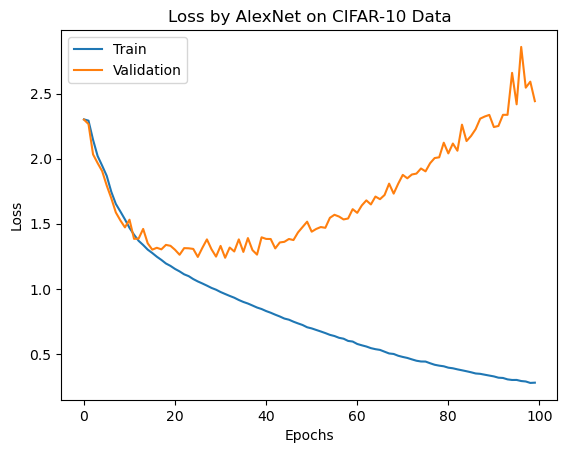

In [24]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

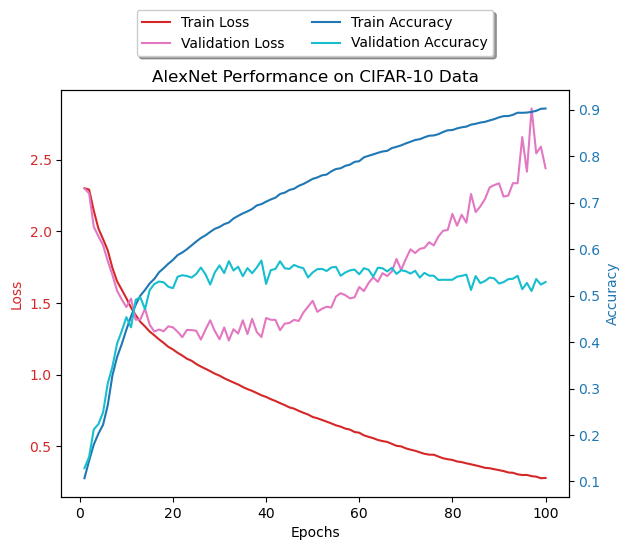

In [27]:
#3. Create at least two more visualizations using matplotlib (Other than provided in the source file)

import matplotlib.pyplot as plt

epochs = range(1, len(history1.history['accuracy']) + 1)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color=color)
ax1.plot(epochs, history1.history['loss'], label='Train Loss', color=color)
ax1.plot(epochs, history1.history['val_loss'], label='Validation Loss', color='tab:pink')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(epochs, history1.history['accuracy'], label='Train Accuracy', color=color)
ax2.plot(epochs, history1.history['val_accuracy'], label='Validation Accuracy', color='tab:cyan')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=2)
plt.title("AlexNet Performance on CIFAR-10 Data")
plt.show()


In [ ]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

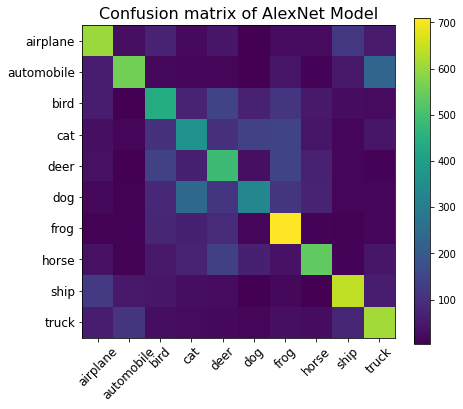

In [25]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [26]:
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions))

Test accuracy by AlexNet: 0.5902


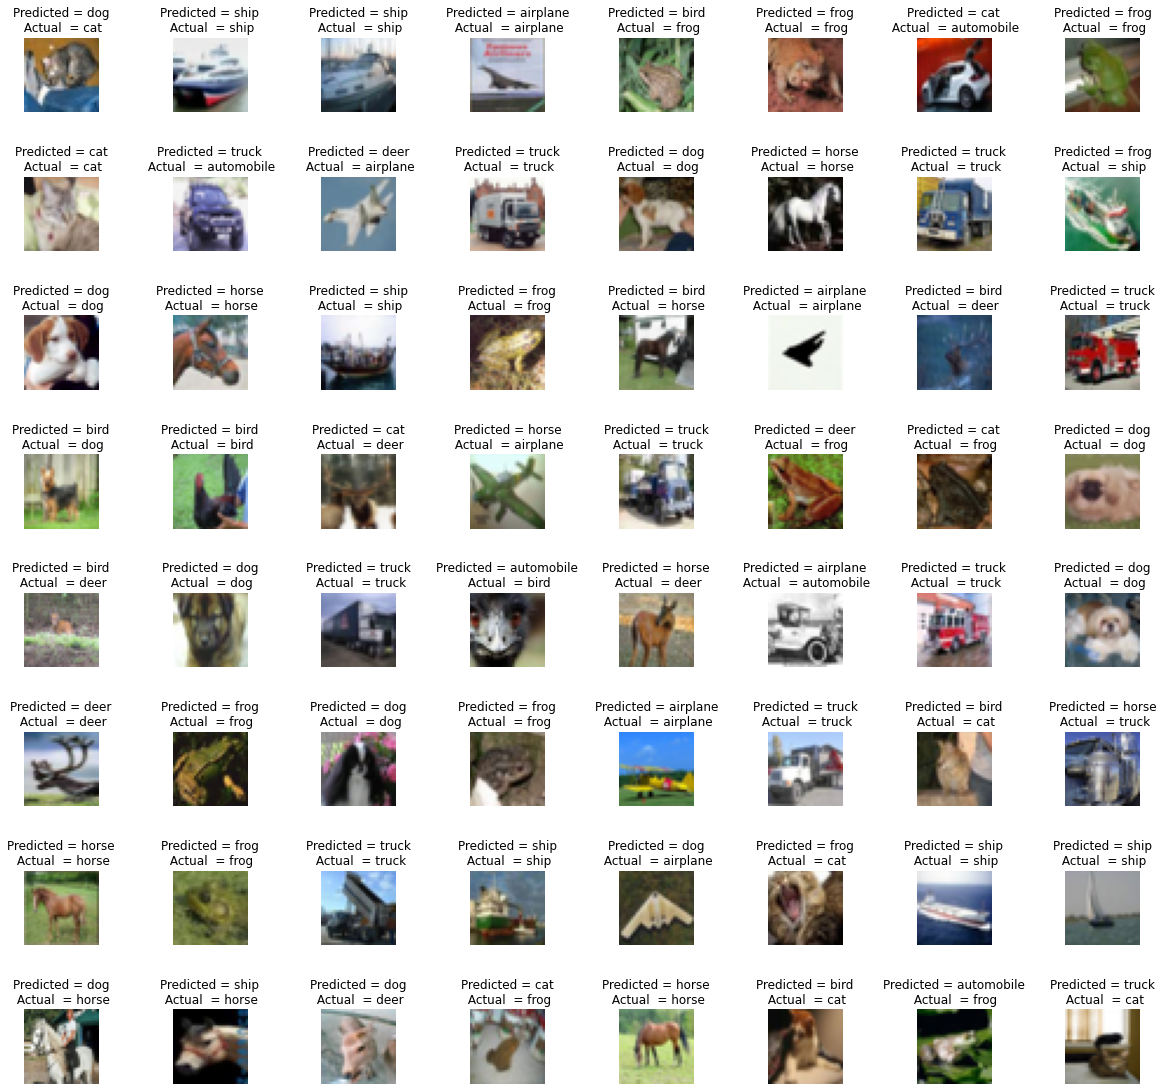

In [27]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)